In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import scipy as sp
from scipy.fft import fftshift, fft, ifft, fftfreq, ifftshift

import GetData as gd
import augment as aug
from optim import _filter

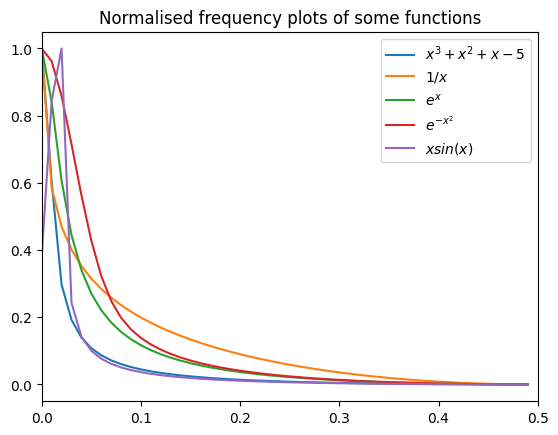

In [3]:
f = [lambda x: x**3+x**2+x-5, lambda x: 1/x, np.exp, lambda x: np.exp(-x**2), lambda x: x*np.sin(x)]
f_name = ["$x^{3} + x^{2}+x-5$", "$1/x$", "$e^{x}$", "$e^{-x^{2}}$", "$xsin(x)$"]
plt.title("Normalised frequency plots of some functions")
plt.xlim(0, 0.5)
x = np.linspace(0.001, 10, 100)
freqs = fftshift(fftfreq(100))
for i, name in zip(f, f_name):
    y = i(x)
    yfft = aug.normalisation(fftshift(abs(fft(y))))
    plt.plot(freqs, yfft, label=name)
plt.legend()



/Library/Python/3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


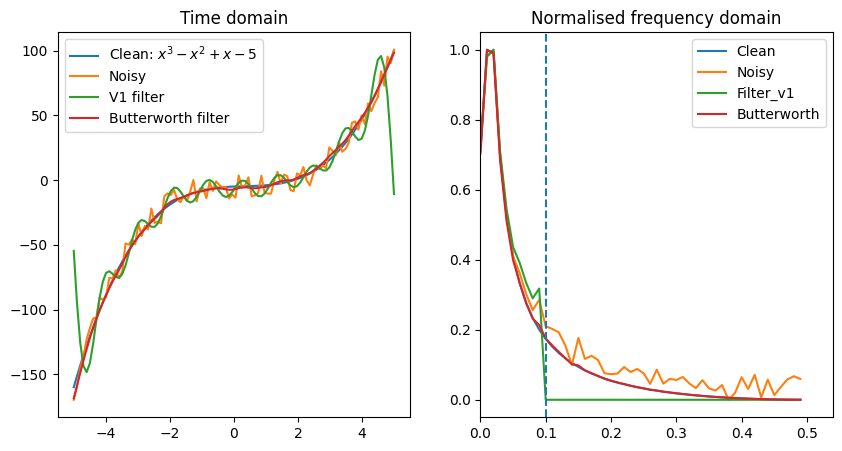

In [4]:
def first_gen_filter(yfft, cf):
      freqs = fftshift(fftfreq(len(y)))
      yfft = yfft.copy()
      yfft[(freqs>=cf) | (freqs<=-cf)] = 0
      return yfft

def butter(y, cf, order=1):
    b, a = sp.signal.butter(order, cf)
    return sp.signal.filtfilt(b, a, y)

f = lambda x: x**3 - x**2 + x -5
x = np.linspace(-5, 5, 100)
y = f(x)
yfft = fftshift(fft(y))
noisy = gd.corrupt(y)
noisy_fft = fftshift(fft(noisy))
noisy_fft_f1 = first_gen_filter(noisy_fft, 0.1)

clean_f1 = ifft(ifftshift(noisy_fft_f1))
clean_fb = butter(noisy, 0.1)

noisy_fft_fb = fftshift(fft(clean_fb))


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Time domain
ax[0].set_title("Time domain")
ax[0].plot(x, y, label="Clean: $x^{3} - x^{2} + x - 5$")
ax[0].plot(x, noisy, label="Noisy")
ax[0].plot(x, clean_f1, label="V1 filter")
ax[0].plot(x, clean_fb, label="Butterworth filter")
ax[0].legend()

# Frequency domain
ax[1].set_title("Normalised frequency domain")
ax[1].plot(freqs, aug.normalisation(abs(yfft)), label="Clean")
ax[1].plot(freqs, aug.normalisation(abs(noisy_fft)), label="Noisy")
ax[1].plot(freqs, aug.normalisation(abs(noisy_fft_f1)), label="Filter_v1")
ax[1].plot(freqs, aug.normalisation(abs(noisy_fft_fb)), label="Butterworth")
ax[1].axvline(0.1, linestyle="--")
ax[1].set_xlim(0, None)
ax[1].legend()




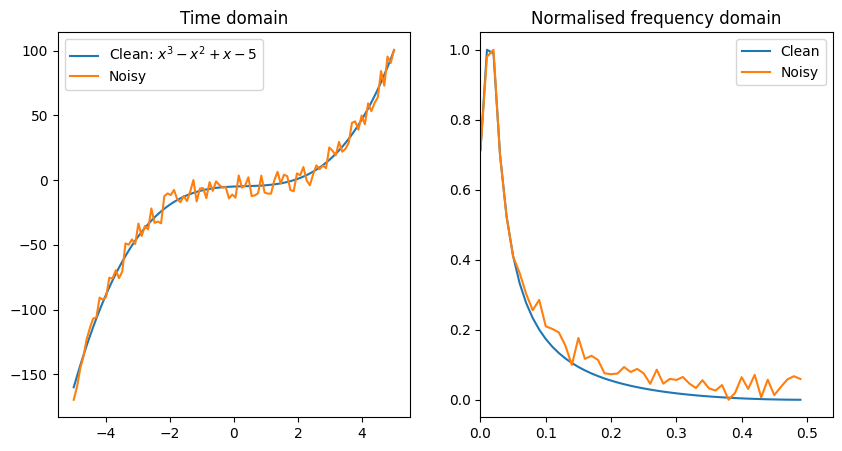

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Time domain
ax[0].set_title("Time domain")
ax[0].plot(x, y, label="Clean: $x^{3} - x^{2} + x - 5$")
ax[0].plot(x, noisy, label="Noisy")
ax[0].legend()

# Frequency domain
ax[1].set_title("Normalised frequency domain")
ax[1].plot(freqs, aug.normalisation(abs(yfft)), label="Clean")
ax[1].plot(freqs, aug.normalisation(abs(noisy_fft)), label="Noisy")
ax[1].set_xlim(0, None)
ax[1].legend()

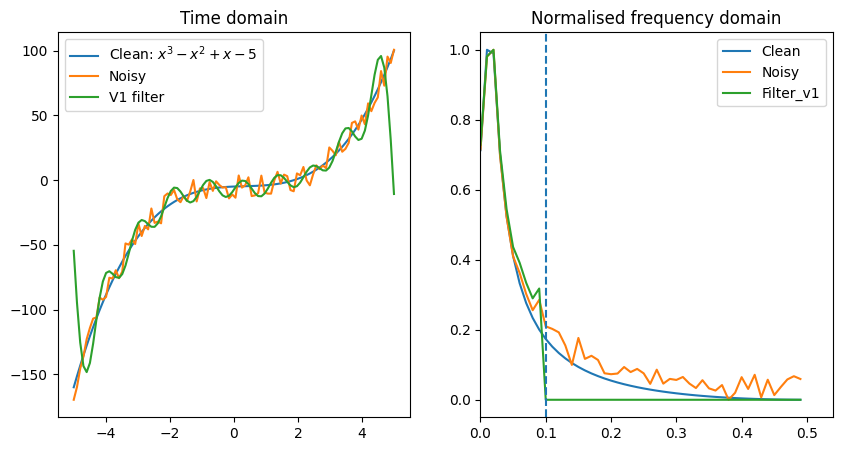

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Time domain
ax[0].set_title("Time domain")
ax[0].plot(x, y, label="Clean: $x^{3} - x^{2} + x - 5$")
ax[0].plot(x, noisy, label="Noisy")
ax[0].plot(x, clean_f1, label="V1 filter")
ax[0].legend()

# Frequency domain
ax[1].set_title("Normalised frequency domain")
ax[1].plot(freqs, aug.normalisation(abs(yfft)), label="Clean")
ax[1].plot(freqs, aug.normalisation(abs(noisy_fft)), label="Noisy")
ax[1].plot(freqs, aug.normalisation(abs(noisy_fft_f1)), label="Filter_v1")
ax[1].axvline(0.1, linestyle="--")
ax[1].set_xlim(0, None)
ax[1].legend()

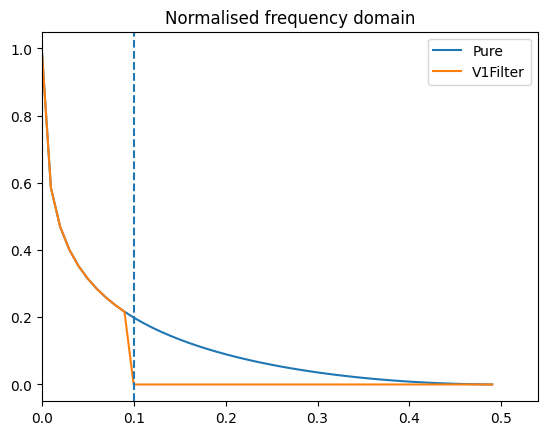

In [14]:
x = np.linspace(0.001, 10, 100)
y = (lambda x: 1/x)(x)
freqs = fftshift(fftfreq(100))
yfft = aug.normalisation(fftshift(abs(fft(y))))
yfft_filtered = yfft.copy()
yfft_filtered[freqs>=0.1] = 0
plt.title("Normalised frequency domain")
plt.plot(freqs, yfft, label="Pure")
plt.plot(freqs, yfft_filtered, label="V1Filter")
plt.axvline(0.1, linestyle="--")
plt.xlim(0, None)
plt.legend()